In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df_accepted = pd.read_csv("accepted_2007_to_2018Q4.csv")
# df_rejected = pd.read_csv("rejected.csv")

/Users/spencersiegel/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df_accepted.info())
# print(df_rejected.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
None


In [4]:
df_accepted.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [5]:
df = df_accepted[df_accepted['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]

In [6]:
# dummy variable to include Default in Charged Off
# df['bad_loan'] = 

In [7]:
df['year'] = df['issue_d'].str.strip().str[-4:]

/Users/spencersiegel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df.year.value_counts()

2015    375546
2016    293105
2014    223103
2017    169321
2013    134804
2018     56318
2012     53367
2011     21721
2010     11536
2009      4716
2008      1562
2007       251
Name: year, dtype: int64

In [9]:
df = df[df['year'].isin(['2014', '2015', '2016', '2017', '2018'])]

In [10]:
df.shape

(1117393, 152)

In [11]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_last_payment_amount', 'disbursement_method',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'year'],
      dtype='object', length=152)

In [12]:
total_num = df.isnull().sum().sort_values(ascending=False)

In [13]:
perc = df.isnull().sum()/df.isnull().count() *100
perc1 = (round(perc,2).sort_values(ascending=False))

# Creating a data frame:
df_miss = pd.concat([total_num, perc1], axis =1 , keys =["Total Missing Values", "Percentage %"]).sort_values(by ="Percentage %", ascending = False)

/Users/spencersiegel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [14]:
top_mis = df_miss[df_miss["Percentage %"]<10]
top_mis.reset_index(inplace=True)
vals = list(top_mis['index'])

In [15]:
df = df[vals]

In [16]:
df.shape

(1117393, 94)

In [17]:
num_feat = df.select_dtypes('number').columns.values
df[num_feat].nunique().sort_values()

policy_code               1
num_tl_30dpd              5
num_tl_120dpd_2m          6
inq_last_6mths            7
acc_now_delinq            8
                     ...   
tot_hi_cred_lim      405183
total_rec_int        464335
last_pymnt_amnt      615096
total_pymnt_inv      878429
total_pymnt         1047106
Length: 69, dtype: int64

In [32]:
import numpy as np
from itertools import combinations
from scipy.stats import pearsonr
df2 = df.dropna()
num_feat = df2.select_dtypes('number').columns.values
comb_num_feat = np.array(list(combinations(num_feat, 2)))
corr_num_feat = np.array([])
for comb in comb_num_feat:
    corr = pearsonr(df2[comb[0]], df2[comb[1]])[0]
    corr_num_feat = np.append(corr_num_feat, corr)

In [33]:
corr_num_feat

array([ 0.00099082, -0.01138136,  0.09027688, ...,  0.51358516,
        0.04309921,  0.25589371])

In [34]:
high_corr_num = comb_num_feat[np.abs(corr_num_feat) >= 0.8]
high_corr_num

/Users/spencersiegel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


array([['bc_util', 'percent_bc_gt_75'],
       ['bc_util', 'revol_util'],
       ['bc_open_to_buy', 'total_bc_limit'],
       ['revol_bal', 'total_rev_hi_lim'],
       ['recoveries', 'collection_recovery_fee'],
       ['total_pymnt_inv', 'total_rec_prncp'],
       ['total_pymnt_inv', 'total_pymnt'],
       ['total_pymnt_inv', 'installment'],
       ['total_pymnt_inv', 'funded_amnt_inv'],
       ['total_pymnt_inv', 'funded_amnt'],
       ['total_pymnt_inv', 'loan_amnt'],
       ['total_rec_prncp', 'total_pymnt'],
       ['total_pymnt', 'installment'],
       ['total_pymnt', 'funded_amnt_inv'],
       ['total_pymnt', 'funded_amnt'],
       ['total_pymnt', 'loan_amnt'],
       ['total_il_high_credit_limit', 'total_bal_ex_mort'],
       ['tot_hi_cred_lim', 'tot_cur_bal'],
       ['tot_cur_bal', 'avg_cur_bal'],
       ['num_actv_bc_tl', 'num_bc_sats'],
       ['num_actv_bc_tl', 'num_rev_tl_bal_gt_0'],
       ['num_actv_bc_tl', 'num_actv_rev_tl'],
       ['out_prncp_inv', 'out_prncp'],
     

In [35]:
df3 = df.drop(np.unique(high_corr_num[:, 0]), axis=1, errors='ignore')
df3.shape

(1117393, 73)

In [36]:
df3.head()

,mths_since_recent_inq,emp_title,emp_length,num_tl_120dpd_2m,mo_sin_old_il_acct,title,percent_bc_gt_75,mths_since_recent_bc,last_pymnt_d,revol_util,...,num_accts_ever_120_pd,mort_acc,mo_sin_rcnt_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,loan_status,loan_amnt,last_pymnt_amnt,last_fico_range_low,zip_code
0,4.0,leadman,10+ years,0.0,148.0,Debt consolidation,0.0,4.0,Jan-2019,29.7,...,2.0,1.0,3.0,3.0,128.0,Fully Paid,3600.0,122.67,560.0,190xx
1,0.0,Engineer,10+ years,0.0,113.0,Business,7.7,2.0,Jun-2016,19.2,...,0.0,4.0,2.0,2.0,192.0,Fully Paid,24700.0,926.35,695.0,577xx
2,10.0,truck driver,10+ years,0.0,125.0,NaN,50.0,101.0,Jun-2017,56.2,...,0.0,5.0,14.0,14.0,184.0,Fully Paid,20000.0,15813.30,700.0,605xx
4,1.0,Contract Specialist,3 years,0.0,128.0,Major purchase,60.0,4.0,Jul-2016,64.5,...,0.0,6.0,4.0,4.0,210.0,Fully Paid,10400.0,10128.96,700.0,174xx
5,NaN,Veterinary Tecnician,4 years,0.0,338.0,Debt consolidation,100.0,36.0,May-2017,68.4,...,0.0,0.0,32.0,32.0,54.0,Fully Paid,11950.0,7653.56,755.0,300xx


In [37]:
# df3.info()
df3['loan_status'].value_counts()

Fully Paid     884132
Charged Off    233221
Default            40
Name: loan_status, dtype: int64

In [38]:
# df3.drop(['emp_title', ])
df4 = df3.select_dtypes(include='object')

In [39]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117393 entries, 0 to 2260697
Data columns (total 25 columns):
emp_title               1045806 non-null object
emp_length              1047842 non-null object
title                   1100752 non-null object
last_pymnt_d            1115301 non-null object
pymnt_plan              1117393 non-null object
purpose                 1117393 non-null object
sub_grade               1117393 non-null object
year                    1117393 non-null object
verification_status     1117393 non-null object
url                     1117393 non-null object
term                    1117393 non-null object
initial_list_status     1117393 non-null object
id                      1117393 non-null object
home_ownership          1117393 non-null object
hardship_flag           1117393 non-null object
grade                   1117393 non-null object
earliest_cr_line        1117393 non-null object
disbursement_method     1117393 non-null object
debt_settlement_flag   

In [40]:
# MAYBE FEATURE ENGINEER REGION FROM "ADDR_STATE"
# - create interest rate factor type variable

In [41]:
drop_col = ['emp_title', 
            'title', 
            'last_pymnt_d', 
            'pymnt_plan', 
            'url', 
            'id', 
            'hardship_flag', 
            'grade', 
            'earliest_cr_line', 
            'year', 
            'last_credit_pull_d', 
            'zip_code',
            
            ##numeral variables
            'last_fico_range_low',
            'last_pymnt_amnt',
            ]

In [42]:
df3 = df3.drop(drop_col, axis=1)

In [43]:
df3.shape

(1117393, 59)

In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117393 entries, 0 to 2260697
Data columns (total 59 columns):
mths_since_recent_inq         1010973 non-null float64
emp_length                    1047842 non-null object
num_tl_120dpd_2m              1067773 non-null float64
mo_sin_old_il_acct            1085475 non-null float64
percent_bc_gt_75              1104650 non-null float64
mths_since_recent_bc          1105784 non-null float64
revol_util                    1116711 non-null float64
dti                           1117019 non-null float64
policy_code                   1117393 non-null float64
pub_rec                       1117393 non-null float64
pub_rec_bankruptcies          1117393 non-null float64
purpose                       1117393 non-null object
acc_now_delinq                1117393 non-null float64
sub_grade                     1117393 non-null object
tax_liens                     1117393 non-null float64
verification_status           1117393 non-null object
total_rev_h

In [45]:
# df4['num_tl_120dpd_2m'].value_counts()

In [46]:
df4 = df3.select_dtypes(include='object')
categorical_features = list(df4.columns)

In [47]:
#categories
for col in categorical_features:
        df3[col] = df3[col].astype('category')

In [48]:
df3['policy_code'] = df3['policy_code'].astype('category')

In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117393 entries, 0 to 2260697
Data columns (total 59 columns):
mths_since_recent_inq         1010973 non-null float64
emp_length                    1047842 non-null category
num_tl_120dpd_2m              1067773 non-null float64
mo_sin_old_il_acct            1085475 non-null float64
percent_bc_gt_75              1104650 non-null float64
mths_since_recent_bc          1105784 non-null float64
revol_util                    1116711 non-null float64
dti                           1117019 non-null float64
policy_code                   1117393 non-null category
pub_rec                       1117393 non-null float64
pub_rec_bankruptcies          1117393 non-null float64
purpose                       1117393 non-null category
acc_now_delinq                1117393 non-null float64
sub_grade                     1117393 non-null category
tax_liens                     1117393 non-null float64
verification_status           1117393 non-null category
to

In [50]:
libor = pd.read_csv('libor.csv')
libor.head()

,month,libor
0,Jan-2020,1.66
1,Dec-2019,1.76
2,Nov-2019,1.69
3,Oct-2019,1.79
4,Sep-2019,2.02


In [298]:
df3['issue_d'] = df3['issue_d'].astype('object')
df123 = pd.merge(df3, libor, left_on='issue_d', right_on='month')
df123.head()

,mths_since_recent_inq,emp_length,num_tl_120dpd_2m,mo_sin_old_il_acct,percent_bc_gt_75,mths_since_recent_bc,revol_util,dti,policy_code,pub_rec,...,acc_open_past_24mths,num_accts_ever_120_pd,mort_acc,mo_sin_rcnt_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,loan_status,loan_amnt,month,libor
0,4.0,10+ years,0.0,148.0,0.0,4.0,29.7,5.91,1.0,0.0,...,4.0,2.0,1.0,3.0,3.0,128.0,Fully Paid,3600.0,Dec-2015,0.42
1,0.0,10+ years,0.0,113.0,7.7,2.0,19.2,16.06,1.0,0.0,...,4.0,0.0,4.0,2.0,2.0,192.0,Fully Paid,24700.0,Dec-2015,0.42
2,10.0,10+ years,0.0,125.0,50.0,101.0,56.2,10.78,1.0,0.0,...,6.0,0.0,5.0,14.0,14.0,184.0,Fully Paid,20000.0,Dec-2015,0.42
3,1.0,3 years,0.0,128.0,60.0,4.0,64.5,25.37,1.0,0.0,...,10.0,0.0,6.0,4.0,4.0,210.0,Fully Paid,10400.0,Dec-2015,0.42
4,NaN,4 years,0.0,338.0,100.0,36.0,68.4,10.20,1.0,0.0,...,0.0,0.0,0.0,32.0,32.0,54.0,Fully Paid,11950.0,Dec-2015,0.42


In [299]:
df123 = df123.drop('month', axis=1)
df123.shape

(1117393, 60)

In [300]:
numeric_features = df123.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df123.select_dtypes(include=['object', 'category']).columns
categorical_features=categorical_features.drop(['loan_status'])

# print(numeric_features)

In [302]:
# # imputing

# #6 You need to import an imputer, for instance the Imputer from sklearn
# from sklearn.impute import SimpleImputer

# #6a Now you need to impute missing numerical values. What imputation strategy will you choose?
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
# imputer = imputer.fit(df123[numeric_features.tolist()])
# df123[numeric_features.tolist()] = imputer.transform(df123[numeric_features.tolist()])

# #new
# imputercat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# df123[categorical_features] = imputercat.fit_transform(df123[categorical_features.tolist()])

# #6d Check if you resolved all missing values
# print(df123.isnull().sum())
df123['loan_status']=np.where(df123.loan_status=='Default','Charged Off',df123.loan_status)

In [55]:
# df123['int_rate_over_libor'] = df123['int_rate']/(df123['libor'])
# df123[['issue_d', 'int_rate', 'libor', 'int_rate_over_libor']]

In [304]:
#dropped these two because too many unique values. Maybe we can feature engineer them down.

df123 = df123.drop(['issue_d','addr_state'], axis=1)
data=df123.copy().sample(n=50000, random_state=1)
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns
categorical_features=categorical_features.drop(['loan_status'])
X = data.loc[:, data.columns != 'loan_status']
# Create a new dataframe y that includes only our 
y = data.loan_status

In [305]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


#1 Inner Pipeline1: Create a numeric transformer with 2 steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median'))])

#2 Inner Pipeline2: Create a categorical transformer with 2 steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

#3 Create Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

0.9284
              precision    recall  f1-score   support

 Charged Off       1.00      0.66      0.79      3104
  Fully Paid       0.92      1.00      0.96     11896

    accuracy                           0.93     15000
   macro avg       0.96      0.83      0.87     15000
weighted avg       0.93      0.93      0.92     15000



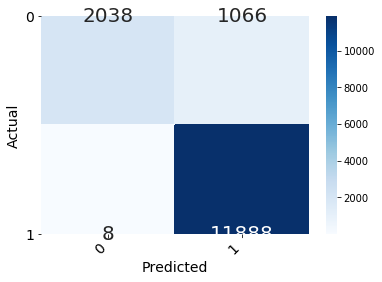

In [58]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest
from matplotlib import pyplot as plt
MainPipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=90) )])
#('fs',SelectFromModel(ExtraTreesClassifier())),
# split sample into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=42)  # random_state=21 # stratify=y


# Fit Model
MainPipe.fit(X_train,y_train)

# Predict model
y_pred = MainPipe.predict(X_test)

# Output the accuracy of our prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix to make it easier to read
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('0', '1'), ('0', '1'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [59]:
mult_value=[]
for col in pd.get_dummies(X_train,drop_first=True):
    mult_value.append(len(pd.get_dummies(X_train,drop_first=True)[col].unique())!=1)

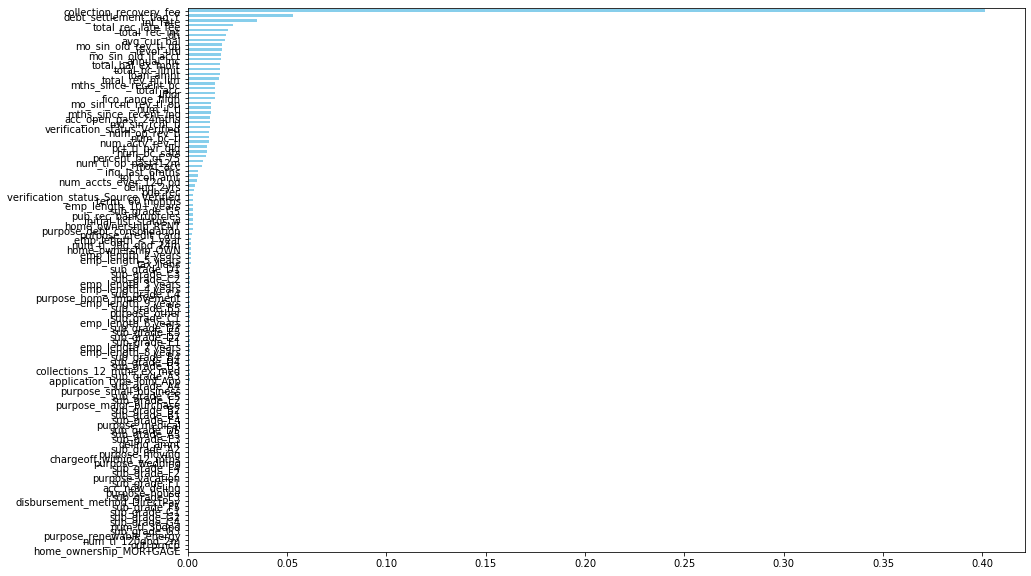

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances_rf = pd.Series(MainPipe.named_steps['classifier'].feature_importances_, 
                           index = pd.get_dummies(X,drop_first=True).drop(['home_ownership_NONE','purpose_educational'],axis=1).columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
plt.figure(figsize=(15,10))
sorted_importances_rf.plot(kind='barh', color='skyblue'); 
plt.show()

In [61]:
sorted_importances_rf[-30:].index.tolist()

['num_bc_sats',
 'pct_tl_nvr_dlq',
 'num_actv_rev_tl',
 'num_bc_tl',
 'num_op_rev_tl',
 'verification_status_Verified',
 'mo_sin_rcnt_tl',
 'acc_open_past_24mths',
 'mths_since_recent_inq',
 'num_il_tl',
 'mo_sin_rcnt_rev_tl_op',
 'fico_range_high',
 'libor',
 'total_acc',
 'mths_since_recent_bc',
 'total_rev_hi_lim',
 'loan_amnt',
 'total_bc_limit',
 'total_bal_ex_mort',
 'annual_inc',
 'mo_sin_old_il_acct',
 'revol_util',
 'mo_sin_old_rev_tl_op',
 'avg_cur_bal',
 'dti',
 'total_rec_int',
 'total_rec_late_fee',
 'int_rate',
 'debt_settlement_flag_Y',
 'collection_recovery_fee']

In [67]:
drop_vars = [
 'num_op_rev_tl',
 'acc_open_past_24mths',
 'mo_sin_rcnt_tl',
 'mths_since_recent_inq',
#  'mo_sin_rcnt_rev_tl_op',
 #'num_rev_accts',    #maybe
 'num_il_tl',        #maybe
#  'verification_status_Verified',
#  'total_acc',
 'mths_since_recent_bc',
#  'fico_range_high',
#  'libor',
 'total_rev_hi_lim', #maybe
 'total_bc_limit',   #maybe
#     
 'total_bal_ex_mort',
#  'loan_amnt',
# 'bc_util',
#  'revol_util',
#  'annual_inc',
 'mo_sin_old_il_acct',
#  'bc_open_to_buy', 
#  'tot_cur_bal',
 'mo_sin_old_rev_tl_op',
 'avg_cur_bal',
#  'dti',
 'total_rec_int',
 'total_rec_late_fee',
#  'int_rate'
 'debt_settlement_flag',
 'collection_recovery_fee'
]

#"['num_rev_accts' 'bc_util' 'total_rec_late_feedebt_settlement_flag'] not found in axis"

Use the above to drop features (i have shown some examples below) that are not helpful in prediction. These are features that we would not know prior to investing in a loan. 

Then we can recreate the model and train and test on that.

In [306]:

df123 = df123.drop(drop_vars, axis=1)
data=df123.copy().sample(n=50000, random_state=1)
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns
categorical_features=categorical_features.drop(['loan_status'])
X = data.loc[:, data.columns != 'loan_status']
# Create a new dataframe y that includes only our 
y = data.loan_status

In [307]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#from sklearn.impute import Imputer
from sklearn.compose import ColumnTransformer


#1 Inner Pipeline1: Create a numeric transformer with 2 steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median'))])

#2 Inner Pipeline2: Create a categorical transformer with 2 steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

#3 Create Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

0.7959333333333334
              precision    recall  f1-score   support

 Charged Off       0.56      0.07      0.12      3104
  Fully Paid       0.80      0.99      0.88     11896

    accuracy                           0.80     15000
   macro avg       0.68      0.53      0.50     15000
weighted avg       0.75      0.80      0.73     15000



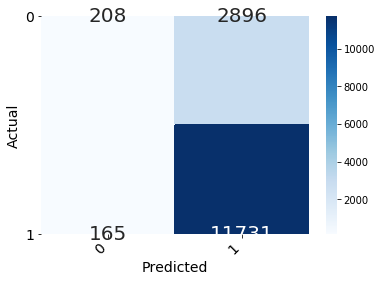

In [308]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest
from matplotlib import pyplot as plt
MainPipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=90) )])
#('fs',SelectFromModel(ExtraTreesClassifier())),
# split sample into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=42)  # random_state=21 # stratify=y


# Fit Model
MainPipe.fit(X_train,y_train)

# Predict model
y_pred = MainPipe.predict(X_test)

# Output the accuracy of our prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix to make it easier to read
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('0', '1'), ('0', '1'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

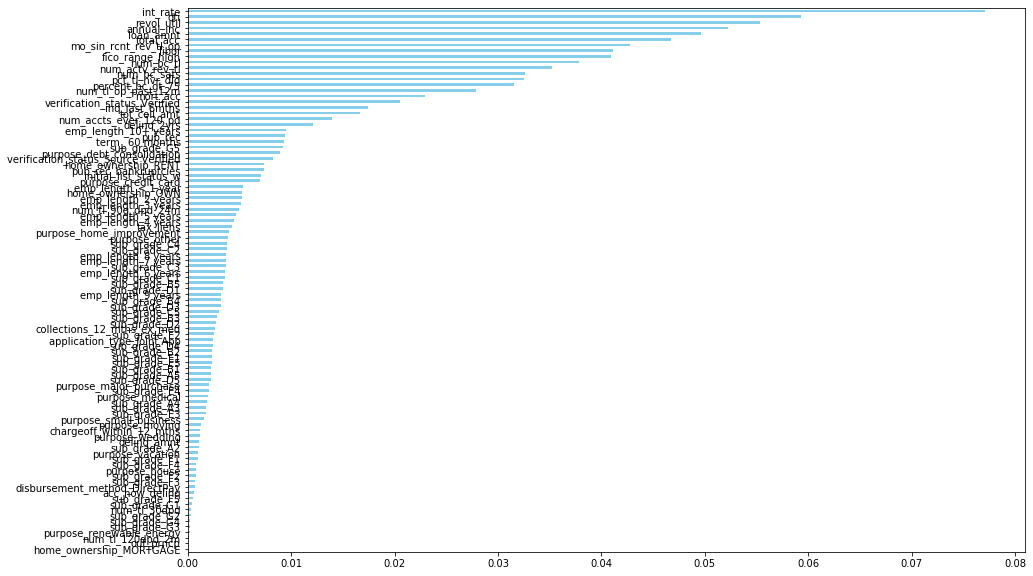

In [309]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances_rf = pd.Series(MainPipe.named_steps['classifier'].feature_importances_, index = pd.get_dummies(X,drop_first=True).drop(['home_ownership_NONE','purpose_educational'],axis=1).columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
plt.figure(figsize=(15,10))
sorted_importances_rf.plot(kind='barh', color='skyblue'); 
plt.show()

In [72]:
sorted_importances_rf.index.tolist()

['out_prncp',
 'home_ownership_MORTGAGE',
 'purpose_renewable_energy',
 'num_tl_120dpd_2m',
 'sub_grade_G4',
 'sub_grade_G3',
 'sub_grade_G2',
 'num_tl_30dpd',
 'sub_grade_G1',
 'disbursement_method_DirectPay',
 'sub_grade_F5',
 'acc_now_delinq',
 'sub_grade_F3',
 'sub_grade_F2',
 'sub_grade_F4',
 'purpose_house',
 'sub_grade_F1',
 'purpose_vacation',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'purpose_wedding',
 'purpose_moving',
 'sub_grade_A2',
 'purpose_small_business',
 'sub_grade_E3',
 'purpose_medical',
 'sub_grade_E4',
 'sub_grade_A4',
 'purpose_major_purchase',
 'sub_grade_A3',
 'sub_grade_A5',
 'sub_grade_D5',
 'sub_grade_B1',
 'application_type_Joint App',
 'sub_grade_E5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_B2',
 'collections_12_mths_ex_med',
 'sub_grade_D4',
 'sub_grade_B3',
 'sub_grade_D2',
 'sub_grade_C5',
 'sub_grade_D3',
 'emp_length_9 years',
 'sub_grade_B5',
 'sub_grade_B4',
 'emp_length_8 years',
 'sub_grade_C1',
 'sub_grade_D1',
 'emp_length_6 years',


In [73]:
df123.shape

(1117393, 42)

In [74]:
final_drop_vars = [
 'out_prncp', #dropping because 0 feature imporatnce
#  'home_ownership_MORTGAGE',
#  'purpose_renewable_energy',
 'num_tl_120dpd_2m',
#  'sub_grade_G3',
#  'sub_grade_G4',
#  'sub_grade_G2',
#  'sub_grade_G1',
 'num_tl_30dpd',
#  'sub_grade_F5',
#  'acc_now_delinq',
#  'disbursement_method_DirectPay',
#  'sub_grade_F3',
#  'sub_grade_F2',
#  'sub_grade_F4',
#  'purpose_wedding',
#  'purpose_house',
#  'sub_grade_F1',
#  'sub_grade_A2',
#  'purpose_vacation',
 'chargeoff_within_12_mths',         #dont think we have this but double check
#  'delinq_amnt',
#  'purpose_moving',
#  'purpose_small_business',
#  'sub_grade_E3',
#  'purpose_medical',
#  'sub_grade_E4',
#  'sub_grade_A3',
#  'purpose_major_purchase',
#  'sub_grade_A4',
#  'sub_grade_A5',
#  'sub_grade_E5',
#  'sub_grade_B1',
#  'sub_grade_E2',
#  'application_type_Joint App',
#  'sub_grade_D5',
#  'sub_grade_E1',
#  'sub_grade_B2',
#  'sub_grade_D4',
#  'collections_12_mths_ex_med',     #collections excluding medical
#  'sub_grade_B3',
#  'sub_grade_D2',
#  'emp_length_9 years',
#  'sub_grade_C5',
#  'sub_grade_D3',
#  'sub_grade_B4',
#  'emp_length_6 years',
#  'sub_grade_B5',
#  'emp_length_8 years',
#  'sub_grade_D1',
#  'emp_length_7 years',
#  'sub_grade_C1',
#  'sub_grade_C4',
#  'purpose_home_improvement',
#  'purpose_other',
#  'sub_grade_C2',
#  'sub_grade_C3',
 'tax_liens',                 #don think we have this, but check
#  'emp_length_5 years',
#  'emp_length_4 years',
#  'home_ownership_OWN',
#  'emp_length_3 years',
#  'emp_length_2 years',
#  'num_tl_90g_dpd_24m',
#  'emp_length_< 1 year',
#  'initial_list_status_w',
#  'purpose_credit_card',
#  'pub_rec_bankruptcies',    #can we click on 'num public records' and see this?
#  'home_ownership_RENT',
#  'verification_status_Source Verified',
#  'purpose_debt_consolidation',
#  'sub_grade_G5',
#  'term_ 60 months',
#  'emp_length_10+ years',
#  'pub_rec',
#  'delinq_2yrs',
 'num_accts_ever_120_pd',
 'tot_coll_amt',               #we only have "total collections excluding medical" (listed above)
#  'inq_last_6mths',
#  'mort_acc',
 'num_tl_op_past_12m',
#  'percent_bc_gt_75',
 'num_bc_sats',                #maybe keep?
#  'pct_tl_nvr_dlq',
 'num_actv_rev_tl',
 'num_bc_tl',
    
    #already checked above
#  'verification_status_Verified',
#  'fico_range_high',
#  'libor',
#  'mo_sin_rcnt_rev_tl_op',
#  'total_acc',
#  'loan_amnt',
#  'annual_inc',
#  'revol_util',
#  'tot_cur_bal',
#  'bc_open_to_buy',
#  'dti',
#  'int_rate'
]

In [310]:
#final removal

df123 = df123.drop(final_drop_vars, axis=1)
data=df123.copy().sample(n=50000, random_state=1)
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns
categorical_features=categorical_features.drop(['loan_status'])
X = data.loc[:, data.columns != 'loan_status']
# Create a new dataframe y that includes only our 
y = data.loan_status

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#from sklearn.impute import Imputer
from sklearn.compose import ColumnTransformer


#1 Inner Pipeline1: Create a numeric transformer with 2 steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median'))])

#2 Inner Pipeline2: Create a categorical transformer with 2 steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

#3 Create Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

0.7960666666666667
              precision    recall  f1-score   support

 Charged Off       0.55      0.08      0.14      3104
  Fully Paid       0.80      0.98      0.88     11896

    accuracy                           0.80     15000
   macro avg       0.68      0.53      0.51     15000
weighted avg       0.75      0.80      0.73     15000



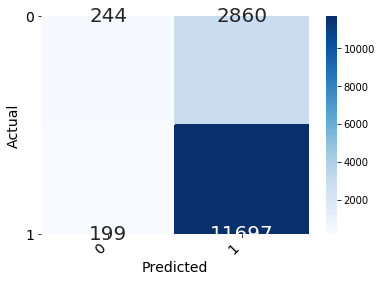

In [77]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest
from matplotlib import pyplot as plt
MainPipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=90) )])
#('fs',SelectFromModel(ExtraTreesClassifier())),
# split sample into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=42)  # random_state=21 # stratify=y


# Fit Model
MainPipe.fit(X_train,y_train)

# Predict model
y_pred = MainPipe.predict(X_test)

# Output the accuracy of our prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix to make it easier to read
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('0', '1'), ('0', '1'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

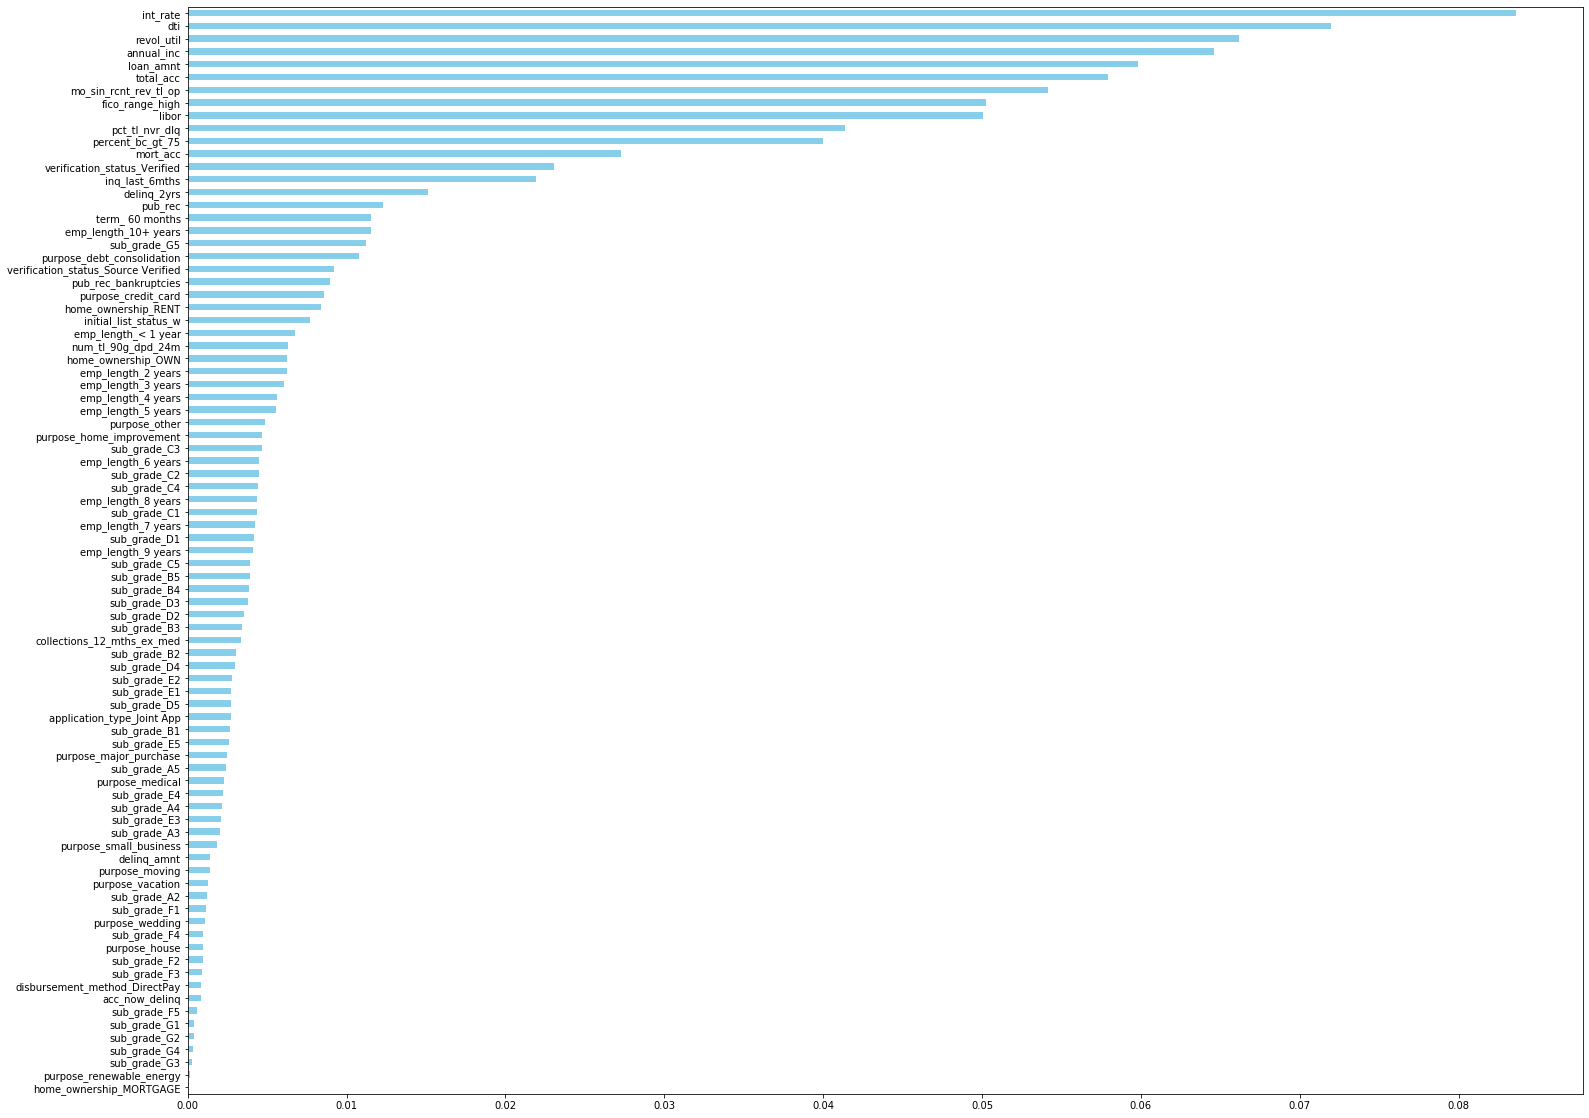

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances_rf = pd.Series(MainPipe.named_steps['classifier'].feature_importances_, index = pd.get_dummies(X,drop_first=True).drop(['home_ownership_NONE','purpose_educational'],axis=1).columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
plt.figure(figsize=(25,20))
sorted_importances_rf.plot(kind='barh', color='skyblue'); 
plt.show()

In [79]:
sorted_importances_rf

home_ownership_MORTGAGE     0.000003
purpose_renewable_energy    0.000154
sub_grade_G3                0.000262
sub_grade_G4                0.000359
sub_grade_G2                0.000416
                              ...   
loan_amnt                   0.059789
annual_inc                  0.064611
revol_util                  0.066200
dti                         0.071991
int_rate                    0.083629
Length: 85, dtype: float64

# Sub Grade Chart

In [80]:
df_sub_grade = df123[['sub_grade', 'loan_status']]
data=df_sub_grade.copy().sample(n=50000, random_state=1)
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns
categorical_features=categorical_features.drop(['loan_status'])
X = data.loc[:, data.columns != 'loan_status']
# Create a new dataframe y that includes only our 
y = data.loan_status

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#from sklearn.impute import Imputer
from sklearn.compose import ColumnTransformer


#1 Inner Pipeline1: Create a numeric transformer with 2 steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median'))])

#2 Inner Pipeline2: Create a categorical transformer with 2 steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

#3 Create Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

0.7920666666666667
              precision    recall  f1-score   support

 Charged Off       0.47      0.04      0.07      3104
  Fully Paid       0.80      0.99      0.88     11896

    accuracy                           0.79     15000
   macro avg       0.63      0.51      0.47     15000
weighted avg       0.73      0.79      0.71     15000



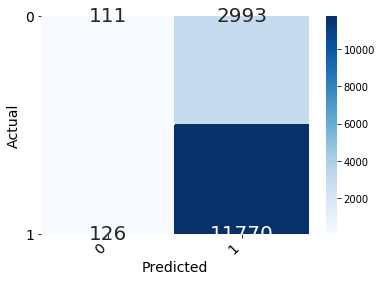

In [82]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest
from matplotlib import pyplot as plt
MainPipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=90) )])
#('fs',SelectFromModel(ExtraTreesClassifier())),
# split sample into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=42)  # random_state=21 # stratify=y


# Fit Model
MainPipe.fit(X_train,y_train)

# Predict model
y_pred = MainPipe.predict(X_test)

# Output the accuracy of our prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix to make it easier to read
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('0', '1'), ('0', '1'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

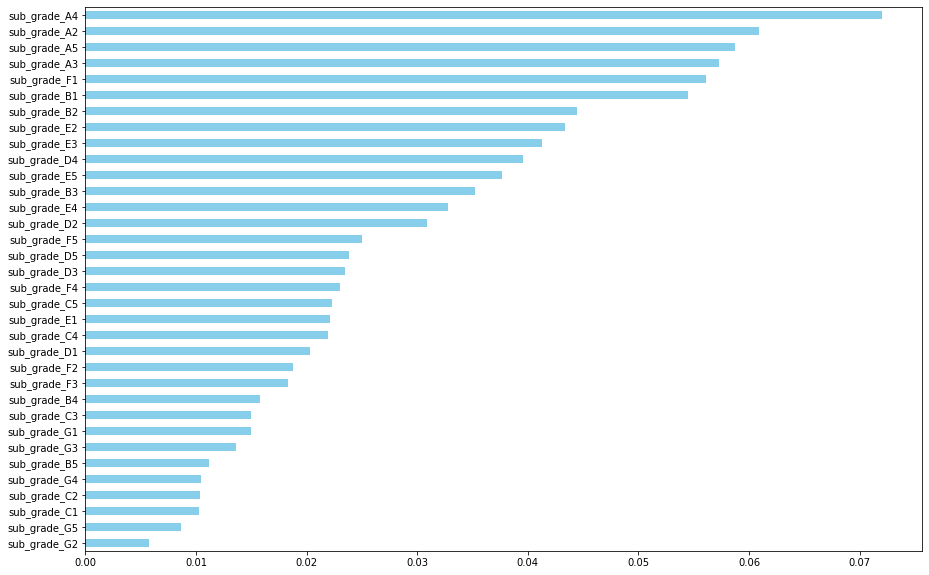

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances_rf = pd.Series(MainPipe.named_steps['classifier'].feature_importances_, index = pd.get_dummies(X,drop_first=True).columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
plt.figure(figsize=(15,10))
sorted_importances_rf.plot(kind='barh', color='skyblue'); 
plt.show()

# Other Features

In [84]:
df_other_features = df123.drop(['sub_grade'], axis=1)
data=df_other_features.copy().sample(n=50000, random_state=1)

numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns
categorical_features=categorical_features.drop(['loan_status'])
X = data.loc[:, data.columns != 'loan_status']
# Create a new dataframe y that includes only our 
y = data.loan_status

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#from sklearn.impute import Imputer
from sklearn.compose import ColumnTransformer


#1 Inner Pipeline1: Create a numeric transformer with 2 steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median'))])

#2 Inner Pipeline2: Create a categorical transformer with 2 steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

#3 Create Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

0.7946666666666666
              precision    recall  f1-score   support

 Charged Off       0.53      0.08      0.13      3104
  Fully Paid       0.80      0.98      0.88     11896

    accuracy                           0.79     15000
   macro avg       0.66      0.53      0.51     15000
weighted avg       0.75      0.79      0.73     15000



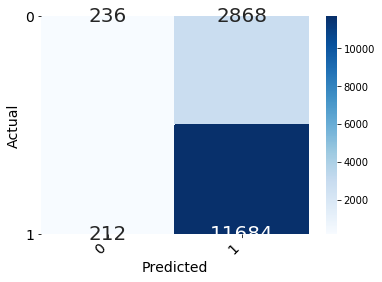

In [86]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest
from matplotlib import pyplot as plt
MainPipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=90) )])
#('fs',SelectFromModel(ExtraTreesClassifier())),
# split sample into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=42)  # random_state=21 # stratify=y


# Fit Model
MainPipe.fit(X_train,y_train)

# Predict model
y_pred = MainPipe.predict(X_test)

# Output the accuracy of our prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix to make it easier to read
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('0', '1'), ('0', '1'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

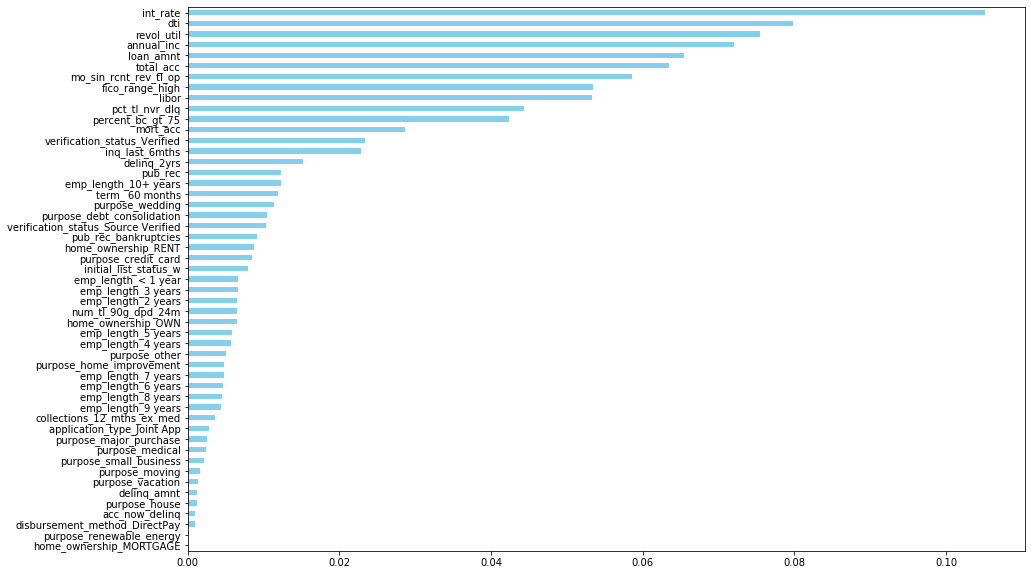

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances_rf = pd.Series(MainPipe.named_steps['classifier'].feature_importances_, index = pd.get_dummies(X,drop_first=True).drop(['home_ownership_NONE','purpose_educational'],axis=1).columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
plt.figure(figsize=(15,10))
sorted_importances_rf.plot(kind='barh', color='skyblue'); 
plt.show()

# Next Steps

- model currently is around 79% accurate
    - need to figure out if we want to drop more of these and if that will improve accuracy?
    - test on a bigger subset? (currently only testing on 50k)
    - use more estimators (currently only using 90)
- return model
    - using same dataset, build a model that predicts return 
    - in the article (https://www.liebertpub.com/doi/full/10.1089/big.2018.0092) it describes how to do that in the end
- combination model
    - also in the article
    - need to make a combined model that accounts for both chance of defaulting and maximizing return
- end goal for notebook
    - to compare each model against a "random investment strategy" to show that our combination model (hopefully) is the best of the 4
    - maybe by coparing AUC as well as running simulations? not sure how to do this
    - clean up redundant code, and add in chart formatting throughout so the notebook looks professtional when we submit it

# Return Model

Should I use default as a predictor? I will for now but when we split it, then I won't


The relevant variables for calculating the return are the loan status, the total payment, the funded amount, the fees generated, and the loan duration.

In [333]:
data_rm = df123.copy()
data_rm['total_pymnt']=df.total_pymnt
data_rm['total_rec_late_fee']=df.total_rec_late_fee
data_rm['funded_amnt_inv']=df.funded_amnt_inv
data_rm['term']=np.where(data_rm['term']==' 36 months',36,60)
data_rm['return']=(((data_rm.total_pymnt+data_rm.total_rec_late_fee)-data_rm.funded_amnt_inv)/data_rm.funded_amnt_inv)*12/data_rm.term
data_rm = data_rm.drop(['total_pymnt','total_rec_late_fee','funded_amnt_inv','term'],axis=1)
data_rm = data_rm.dropna()
data_rm=data_rm[data_rm.loan_status=='Fully Paid']

In [334]:
data=data_rm.sample(n=50000, random_state=1)
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns
#categorical_features=categorical_features.drop(['loan_status'])
#X = data.loc[:, data.columns != 'loan_status']
numeric_features = numeric_features.drop('return')
X= data.drop(['return'],axis=1)
# Create a new dataframe y that includes only our 
y = data['return']

In [335]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#from sklearn.impute import Imputer
from sklearn.compose import ColumnTransformer


#1 Inner Pipeline1: Create a numeric transformer with 2 steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median'))])

#2 Inner Pipeline2: Create a categorical transformer with 2 steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#3 Create Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [336]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest
from matplotlib import pyplot as plt
MainPipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor(n_estimators=90) )])
#('fs',SelectFromModel(ExtraTreesClassifier())),
# split sample into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)  # random_state=21 # stratify=y


# Fit Model
MainPipe.fit(X_train,y_train)

# Predict model
y_pred = MainPipe.predict(X_test)



In [337]:
from sklearn import metrics, model_selection
def evaluate(y_test, y_pred):
    # this block of code returns all the metrics we are interested in 
    mse = metrics.mean_squared_error(y_test, y_pred)
    msa = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)

    print("Mean squared error: ", mse)
    print("Mean absolute error: ", msa)
    print("R^2 : ", r2)
    
    # this creates a chart plotting predicted and actual 
    plt.figure(figsize=(12,6))
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Interest over Libor: $y_i$")
    plt.ylabel("Predicted Interest over Libor: $\hat{y}_i$")
    plt.title("Interest over Libor vs Predicted Interest over Libor: $y_i$ vs $\hat{y}_i$")

Mean squared error:  0.008120766952825363
Mean absolute error:  0.06598572607169144
R^2 :  -0.02207798904711744


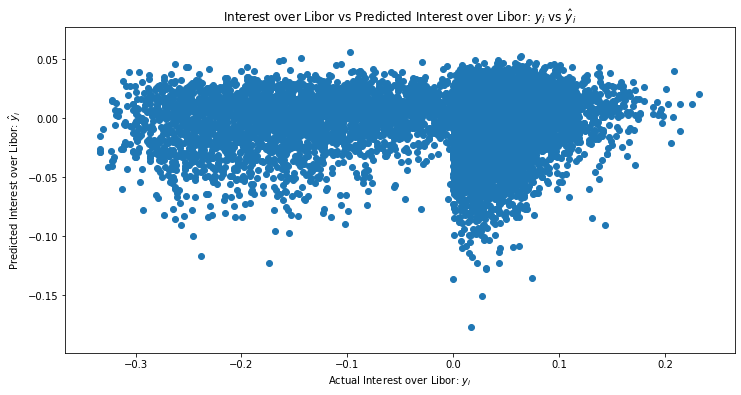

In [338]:
evaluate(y_test, y_pred)